# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Final Exam: COVID-19 Modeling

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



### INSTRUCTIONS

- This final exam is to be completed indivudally.  Do not consult with your peers when working on it (you can aks the teaching staff for clarification questions, including private messages on Ed).
- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

**Note: for all problems, it is up to you to decide how to transform the data (standardization, log transformations, etc.).  Be sure you use and interpret theses transformations approporiately.**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

# You are free to use any functions/methods within these packages (BS4, ELI5, and LIME are fine too)
# if you would like to use any other, please contact hte teaching staff 

<hr style="height:2pt">

# Analyzing the recent spread of COVID-19 

![](fig/vaccine.jpeg)

You are tasked with using the COVID case and vaccination data across counties presented by the CDC to analyze the recent surge in COVID infections and the association with (amonth other predictors).  You are also tasked with building prediction models to forecast how the disease spread will change based on data from the previous week (and  demographic and other measures.

The exam broken into 4 problems:
- Problem 1: Data Wrangling and Explorations
- Problem 2: Interpretive Linear Regression Modeling
- Problem 3: Prediction Modeling
- Problem 4: Further Analysis

You are provided with four raw data files, and a 5th cleaned file is provided to be used for all EDA and modeling tasks.

The variables included in each of the four raw data sets are:

For 'covid_cases_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `county`: county name
- `state`: the state in which the county lies
- `fips`: the unique Federal Information Processing System (FIPS) codes for the county
- `cases`: the cumulative number of confirmed positive cases up to and including that date
- `deaths`: the cumulative number of confirmed COVID-related deaths up to and including that date


For 'vaccines_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `fips`: the unique FIPS code for the county
- `fully`: the percent of residents that are fully vaccinated in the county on that date
- `dose1`: the percent of residents that have received at least one vaccine dose in the county on that date.

For 'masks_county.csv' (note: this is based on a survey conducted by the New York Times in summer of 2020):
- `fips`: the unique FIPS code for the county
- `never`: the percent of respondents that report they never wore masks in public
- `rarely`: the percent of respondents that report they rarely wore masks in public
- `sometimes`: the percent of respondents that report they sometimes wore masks in public	
- `frequently`: the percent of respondents that report they frequently wore masks in public	
- `always`: the percent of respondents that report they always wore masks in public

For 'demographics_county.csv' (note: these are various measures taken from 2010 to 2020):
- `fips`: the unique FIPS code for the county
- `population`: total number of residents in the country	
- `hispanic`: the percentage of residents that self-identify as hispanic
- `minority`: the percentage of residents that self-identify as a minority group (non-white)
- `female`: the percentage of residents that self-identify as female
- `unemployed`: the percentage of residents that are unemployed
- `income`: the median household income, in thousnads of dollards
- `nodegree`: the percentage of residents that report not having graduated high school
- `bachelor`: the percentage of residents that report having a college degree
- `inactivity`: the percentage of residents that get less than 1 hour of vigorous exercise a week
- `obesity`: the percentage of residents that are considered obese based on BMI
- `density`: the population density (residents per square mile)
- `votergap20`: Biden voting percentage minus Trump voting percentage in the 2020 election
- `votergap16`: Clinton voting percentage minus Trump voting percentage in the 2016 election


### Data Sources
- Vaccinations [here](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh).
- Cases [here](https://github.com/nytimes/covid-19-data).
- Mask Usage [here](https://github.com/nytimes/covid-19-data/tree/master/mask-use).
- Demographics [here](https://www.ers.usda.gov/data-products/county-level-data-sets/) 
- 2020 Election [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)



## Question 1 [25pts]: Data Wrangling and Explorations </b></div>

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).

**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, `rate_w29`, and comment on what you notice.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

## Answers

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

Print out each of their dimensions (aka, shapes).

In [2]:
# Load data
covid_raw = pd.read_csv('data/covid_cases_county.csv')
vaccines_raw = pd.read_csv('data/vaccines_county.csv')
masks = pd.read_csv('data/masks_county.csv')
demo = pd.read_csv('data/demographics_county.csv')

# print shapes of the datasets
print(covid_raw.shape[1],"total columns in covid_raw, and ",covid_raw.shape[0],"rows")
print(vaccines_raw.shape[1],"total columns in vaccines_raw",vaccines_raw.shape[0],"rows")
print(masks.shape[1],"total columns in vaccines_raw",masks.shape[0],"rows")
print(demo.shape[1],"total columns in demo",demo.shape[0],"rows")

6 total columns in covid_raw, and  97394 rows
4 total columns in vaccines_raw 96720 rows
6 total columns in vaccines_raw 3142 rows
14 total columns in demo 3114 rows


**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).


In [3]:
# take a look at the covid dataset
covid_raw.head()

,date,county,state,fips,cases,deaths
0,2021-01-03,Autauga,Alabama,1001.0,4305,50.0
1,2021-01-03,Baldwin,Alabama,1003.0,14064,169.0
2,2021-01-03,Barbour,Alabama,1005.0,1530,33.0
3,2021-01-03,Bibb,Alabama,1007.0,1882,46.0
4,2021-01-03,Blount,Alabama,1009.0,4746,63.0


In [4]:
# subset the covid dataset to selected dates
covid = covid_raw.loc[
    (covid_raw['date']=='2021-06-27') |
    (covid_raw['date']=='2021-07-04') |
    (covid_raw['date']=='2021-07-11') |
    (covid_raw['date']=='2021-07-18') |
    (covid_raw['date']=='2021-07-25')
    , :]
print(covid.shape[1],"total columns in covid, and ",covid.shape[0],"rows")

6 total columns in covid, and  16227 rows


In [5]:
# take a look at the vaccine dataset
vaccines_raw.head()

,date,fips,fully,dose1
0,2021-07-25,1001,26.0,34.0
1,2021-07-25,1003,31.4,40.5
2,2021-07-25,1005,27.6,34.3
3,2021-07-25,1007,22.5,29.4
4,2021-07-25,1009,19.3,24.2


In [6]:
# subset the vaccinces dataset to selected dates
vaccines = vaccines_raw.loc[
    (vaccines_raw['date']=='2021-06-27') |
    (vaccines_raw['date']=='2021-07-04') |
    (vaccines_raw['date']=='2021-07-11') |
    (vaccines_raw['date']=='2021-07-18') |
    (vaccines_raw['date']=='2021-07-25')
    , :]
print(vaccines.shape[1],"total columns in vaccinces, and ",vaccines.shape[0],"rows")

4 total columns in vaccinces, and  16120 rows


**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.


In [7]:
# count the number of counties per day in the covid dataset
counties_by_day = covid.groupby('date').agg({'county': 'count',})
print("Number of counties per day in covid dataset:")
counties_by_day.head()

Number of counties per day in covid dataset:


,county
date,
2021-06-27,3245
2021-07-04,3245
2021-07-11,3245
2021-07-18,3246
2021-07-25,3246


**Comment:** Not all days have the same number of counties. It seems some days have no data for some counties (i.e. missing data).

In [8]:
# assess if there's a one-to-one relationships between counties and FIPS
fips_by_day_by_county = covid.groupby(['date','county']).agg({'fips': 'count',})
print("Number of FIPS per day by county:")
print(fips_by_day_by_county[fips_by_day_by_county['fips'] == 0].head())
print(fips_by_day_by_county[fips_by_day_by_county['fips'] > 1].head())

Number of FIPS per day by county:
                          fips
date       county             
2021-06-27 Joplin            0
           Kansas City       0
           New York City     0
           Unknown           0
2021-07-04 Joplin            0
                      fips
date       county         
2021-06-27 Adair         4
           Adams        12
           Albany        2
           Alexander     2
           Allegany      2


**Comment:** Some counties have no FIPS, and some counties have multiple FIPS.

In [9]:
# count the number of counties per day in the covid dataset
counties_by_day = covid.groupby('date').agg({'fips': 'count',})
print("Number of the unique Federal Information Processing System (FIPS) codes for the county per day in covid dataset:")
counties_by_day.head()

Number of the unique Federal Information Processing System (FIPS) codes for the county per day in covid dataset:


,fips
date,
2021-06-27,3218
2021-07-04,3218
2021-07-11,3218
2021-07-18,3218
2021-07-25,3218


In [10]:
# count the number of FIPS per day in the vaccines dataset
covid_fips_count_by_day = vaccines.groupby('date').agg({'fips': 'count',})
print("Number of FIPS per day in vaccines dataset:")
covid_fips_count_by_day.head()

Number of FIPS per day in vaccines dataset:


,fips
date,
2021-06-27,3224
2021-07-04,3224
2021-07-11,3224
2021-07-18,3224
2021-07-25,3224


**Comment:** We can observe missing data for counties and fips. Not all dates have the same number of counties in the covid dataset. The number of FIPS in the covid and vaccine datasets is also not identical. We'll need dilligence when merging the two datasets. Since some counties have no FIPS in the covid dataset, and since the vaccines dataset doesn't have county data, we will likely not be able to include the counties with missing FIPS in a vaccine analysis.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).




In [11]:
# turn the long format into a wide format
# reset the index to repivot
covid_by_county = covid.reset_index(level=0)
# 
covid_by_county = covid_by_county.pivot_table(index=['fips'], columns='date',
                    values=['cases', 'deaths'], aggfunc='sum', margins=False)

In [12]:
# reformat the column names to one level
# create a list of the new column names in the right order
new_cols=[('{1} {0}'.format(*tup)) for tup in covid_by_county.columns]

# assign it to the dataframe (assuming you named it pivoted
covid_by_county.columns= new_cols

# resort the index, so you get the columns in the order you specified
covid_by_county = covid_by_county.sort_index(axis='columns')

In [13]:
# rename the columns
covid_by_county = covid_by_county.rename(columns = {'2021-06-27 cases': 'cases_w26', 
                          '2021-07-04 cases': 'cases_w27',
                          '2021-07-11 cases': 'cases_w28',
                          '2021-07-18 cases': 'cases_w29',
                          '2021-07-25 cases': 'cases_w30',
                          '2021-06-27 deaths': 'deaths_w26', 
                          '2021-07-04 deaths': 'deaths_w27',
                          '2021-07-11 deaths': 'deaths_w28',
                          '2021-07-18 deaths': 'deaths_w29',
                          '2021-07-25 deaths': 'deaths_w30',
                          }, inplace = False)

In [14]:
# check out the covid dataset
covid_by_county.head()

,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,deaths_w29,cases_w30,deaths_w30
fips,,,,,,,,,,
1001.0,7244,113.0,7262,113.0,7299,113.0,7347,113.0,7419,113.0
1003.0,21945,314.0,22043,315.0,22267,318.0,22802,323.0,23810,325.0
1005.0,2344,60.0,2347,60.0,2365,60.0,2394,60.0,2434,61.0
1007.0,2686,64.0,2693,64.0,2702,65.0,2727,65.0,2801,65.0
1009.0,6967,139.0,6988,139.0,7023,139.0,7099,139.0,7184,139.0


In [15]:
# retain the number of columns for future use
nr_columns_covid_by_county = covid_by_county.shape[1]

In [16]:
# turn the long format into a wide format
# reset the index to repivot
vaccines_by_county = vaccines.reset_index(level=0)
# 
vaccines_by_county = vaccines_by_county.pivot_table(index=['fips'], columns='date',
                    values=['fully', 'dose1'], aggfunc='sum', margins=False)

In [17]:
# reformat the column names to one level
# create a list of the new column names in the right order
new_cols=[('{1} {0}'.format(*tup)) for tup in vaccines_by_county.columns]

# assign it to the dataframe (assuming you named it pivoted
vaccines_by_county.columns= new_cols

# resort the index, so you get the columns in the order you specified
vaccines_by_county = vaccines_by_county.sort_index(axis='columns')

In [18]:
# rename the columns
vaccines_by_county = vaccines_by_county.rename(columns = {
                          '2021-06-27 fully': 'fully_w26', 
                          '2021-07-04 fully': 'fully_w27',
                          '2021-07-11 fully': 'fully_w28',
                          '2021-07-18 fully': 'fully_w29',
                          '2021-07-25 fully': 'fully_w30',
                          '2021-06-27 dose1': 'dose1_w26', 
                          '2021-07-04 dose1': 'dose1_w27',
                          '2021-07-11 dose1': 'dose1_w28',
                          '2021-07-18 dose1': 'dose1_w29',
                          '2021-07-25 dose1': 'dose1_w30',
                          }, inplace = False) 

In [19]:
# merge the data with an inner join to remove counties with missing data
covid_and_vaccines_by_fips = covid_by_county.merge(vaccines_by_county, on=['fips'])

# post merge, split the data back into separate datasets
# this will allow both datasets to have an identical set of fips
covid_by_county = covid_and_vaccines_by_fips.iloc[:,:nr_columns_covid_by_county]
vaccines_by_county = covid_and_vaccines_by_fips.iloc[:,nr_columns_covid_by_county:]

In [20]:
# check out the shape of the wide datasets
print(covid_by_county.shape[1],"total columns in covid_by_county, and ",covid_by_county.shape[0],"rows")
print(vaccines_by_county.shape[1],"total columns in vaccines_by_county",vaccines_by_county.shape[0],"rows")

10 total columns in covid_by_county, and  3214 rows
10 total columns in vaccines_by_county 3214 rows


In [21]:
# inspect the covid data
covid_by_county.head()

,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,deaths_w29,cases_w30,deaths_w30
fips,,,,,,,,,,
1001.0,7244,113.0,7262,113.0,7299,113.0,7347,113.0,7419,113.0
1003.0,21945,314.0,22043,315.0,22267,318.0,22802,323.0,23810,325.0
1005.0,2344,60.0,2347,60.0,2365,60.0,2394,60.0,2434,61.0
1007.0,2686,64.0,2693,64.0,2702,65.0,2727,65.0,2801,65.0
1009.0,6967,139.0,6988,139.0,7023,139.0,7099,139.0,7184,139.0


**Comment:** As expected, some records were dropped as part of the merge. There are now 3214 rows, instead of 3218. The rows are identical as an inner join merge dropped records where no matching fips were found.

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.



In [22]:
# retain the original nr. of rows in demo
demo_fips_cnt = demo.shape[0]

# Merge the datasets
covid_merged = covid_by_county.merge(vaccines_by_county, on=['fips'])
covid_merged = covid_merged.merge(masks, on=['fips'])
covid_merged = covid_merged.merge(demo, on=['fips'])
print("The number of records dropped from demo is:", demo_fips_cnt - covid_merged.shape[0])

The number of records dropped from demo is: 6


In [23]:
covid_merged.head()

,fips,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,deaths_w29,cases_w30,...,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,votergap20,votergap16
0,1001.0,7244,113.0,7262,113.0,7299,113.0,7347,113.0,7419,...,51.475,5.2,54.366,13.8,21.9,28.6,34.1,91.8,-44.418437,-49.479
1,1003.0,21945,314.0,22043,315.0,22267,318.0,22802,323.0,23810,...,51.261,5.5,49.626,11.0,28.6,22.3,27.4,114.6,-53.762343,-57.786
2,1005.0,2344,60.0,2347,60.0,2365,60.0,2394,60.0,2434,...,46.589,8.9,34.971,25.4,13.6,31.8,44.4,31.0,-7.663054,-5.611
3,1007.0,2686,64.0,2693,64.0,2702,65.0,2727,65.0,2801,...,46.110,6.6,39.546,22.1,10.2,33.9,40.3,36.8,-57.727983,-55.544
4,1009.0,6967,139.0,6988,139.0,7023,139.0,7099,139.0,7184,...,50.592,5.4,45.567,21.9,12.3,28.0,34.6,88.9,-80.002175,-81.382


**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, July 12-18, `rate_w29`, and comment on what you notice.



In [24]:
# calculate novel case rates
covid_merged['novel_case_rate_w27'] = 1000*(covid_merged['cases_w27'] - 
                                           covid_merged['cases_w26']) / covid_merged['population']
covid_merged['novel_case_rate_w28'] = 1000*(covid_merged['cases_w28'] - 
                                           covid_merged['cases_w27']) / covid_merged['population']
covid_merged['novel_case_rate_w29'] = 1000*(covid_merged['cases_w29'] - 
                                           covid_merged['cases_w28']) / covid_merged['population']
covid_merged['novel_case_rate_w30'] = 1000*(covid_merged['cases_w30'] - 
                                           covid_merged['cases_w29']) / covid_merged['population']

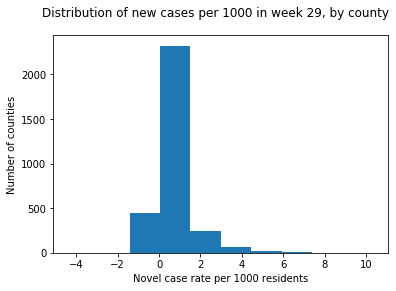

In [25]:
# show histograme for week 29
novel_case_rate_w29_hist = plt.hist(covid_merged['novel_case_rate_w29'])
plt.xlabel("Novel case rate per 1000 residents")
plt.ylabel("Number of counties")
plt.suptitle("Distribution of new cases per 1000 in week 29, by county")
plt.show()

**Comment:** Most counties showed an increase of 1 or 2 cases per thousand in week 29. A few counties had more than 2, going up to an increase of 7 cases per 1000. Close to 500 counties saw a decrease by 1 or w cases, relative to the previous week.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

In [75]:
# read the cleaned dataset
covid_clean = pd.read_csv('data/covid_clean.csv')

**1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?**

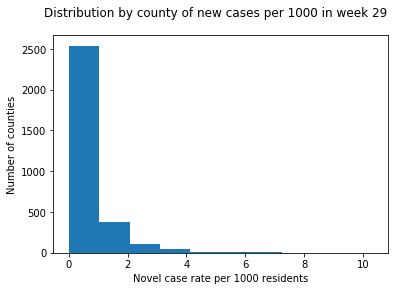

In [76]:
# plot novel cases per 1000 for w29
novel_case_rate_w29_hist = plt.hist(covid_clean['rate_w29']*1000)
plt.xlabel("Novel case rate per 1000 residents")
plt.ylabel("Number of counties")
plt.suptitle("Distribution by county of new cases per 1000 in week 29")
plt.show()

In [77]:
average_covid_increase = covid_clean['rate_w29'].mean()
print("Average covid increase per 1000 in week 29:", average_covid_increase *1000)

Average covid increase per 1000 in week 29: 0.6592153128754568


**Comment:**: The histogram shows that overall rate of covid cases has increased for all counties, on average 0.66 per thousand

**2. Treating the counties as separate and equal observations: in what states did the case rate increase the most? In what states did the case rate decrease the most (or increse the least)? List the top 5 for each. Do you notice any patterns in these states?**

In [78]:
# show the counties with the highest rate increase
covid_clean.sort_values('rate_w29', ascending=False).head()

,fips,date,county,state,cases_w30,deaths_w30,fully_w30,dose1_w30,cases_w26,deaths_w26,...,votergap16,never,rarely,sometimes,frequently,always,rate_w30,rate_w29,rate_w28,rate_w27
385,13053,2021-07-25,Chattahoochee,Georgia,4814,17,99.9,99.9,4487,17,...,-11.055,6.1,7.2,10.8,21.4,54.5,0.001319,0.010346,0.006943,0.004097
2552,48127,2021-07-25,Dimmit,Texas,2890,37,0.0,0.0,2511,37,...,37.178,2.1,5.9,9.7,13.3,69.0,0.014941,0.010131,0.006140,0.007573
149,5129,2021-07-25,Searcy,Arkansas,932,18,27.0,32.3,747,18,...,-63.144,10.0,8.8,12.5,14.9,53.8,0.008434,0.008182,0.003902,0.002769
1560,29213,2021-07-25,Taney,Missouri,7302,106,28.1,34.7,5995,99,...,-59.289,5.3,7.9,21.4,15.5,49.9,0.008663,0.008079,0.006872,0.003602
574,17015,2021-07-25,Carroll,Illinois,2043,38,47.3,54.1,1785,38,...,-27.074,3.0,6.4,12.0,19.0,59.6,0.008572,0.007620,0.000000,0.000190


In [79]:
# show the counties with the highest rate increase
covid_clean.sort_values('rate_w29', ascending=True).head(5)

,fips,date,county,state,cases_w30,deaths_w30,fully_w30,dose1_w30,cases_w26,deaths_w26,...,votergap16,never,rarely,sometimes,frequently,always,rate_w30,rate_w29,rate_w28,rate_w27
1553,29199,2021-07-25,Scotland,Missouri,307,4,20.0,22.9,306,4,...,-58.943,7.3,11.2,20.9,24.6,36.1,0.000208,0.0,0.000000,0.0
1589,30039,2021-07-25,Granite,Montana,204,2,30.2,33.3,204,2,...,-40.567,11.6,17.0,10.9,18.3,42.2,0.000000,0.0,0.000000,0.0
1597,30055,2021-07-25,McCone,Montana,183,2,14.4,14.7,183,1,...,-66.667,14.2,27.4,17.9,26.7,13.9,0.000000,0.0,0.000000,0.0
1598,30057,2021-07-25,Madison,Montana,802,8,36.4,39.2,796,8,...,-44.597,17.2,11.3,10.5,21.0,40.0,0.000536,0.0,0.000268,0.0
1599,30059,2021-07-25,Meagher,Montana,152,7,41.9,44.1,152,7,...,-55.247,18.8,9.3,12.0,20.3,39.6,0.000000,0.0,0.000000,0.0


**Comment:** At first glance it looks like the northern states had the lowest increase in cases, and the mid-country southern states had the highest increase in cases in week 29.

**Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).**

**a. The political views in the county (as measured by the votergap in the 2020 election).**

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


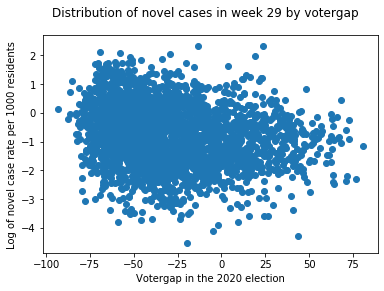

In [80]:
# plot novel cases per 1000 for w29 as a function of votergap
# show the logaritmic view to distribute the scatter more evenly
plt.scatter(covid_clean['votergap20'],np.log(covid_clean['rate_w29']*1000))
plt.xlabel("Votergap in the 2020 election")
plt.ylabel("Log of novel case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by votergap")
plt.show()

**Comment:** Without controlling for confounding factors, there doesn't seem to be a pattern between votergap in the 2020 elections and the covid novel case rate in week 29.

**b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).**

In [81]:
covid_clean_nonzero_vac = covid_clean[covid_clean['fully_w28']!=0]
print("Nr of counties with unreported vaccination numbers in week 28:",covid_clean.shape[0]-
                                                                      covid_clean_nonzero_vac.shape[0])

Nr of counties with unreported vaccination numbers in week 28: 273


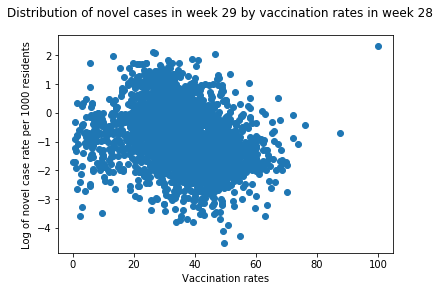

In [82]:
# plot novel cases per 1000 for w29 as a function of vaccination in the previous week
# show the logaritmic view to distribute the scatter more evenly
plt.scatter(covid_clean_nonzero_vac['fully_w28'],np.log(covid_clean_nonzero_vac['rate_w29']*1000))
plt.xlabel("Vaccination rates")
plt.ylabel("Log of novel case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by vaccination rates in week 28")
plt.show()

**Comment:** Without controlling for confounding factors, there doesn't seem to be a pattern between vaccination rates in week 28 and the covid novel case rate in week 29.

**c. The population density of the county.**

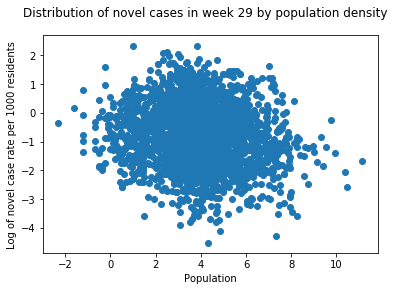

In [83]:
# plot novel cases per 1000 for w29 as a function of votergap
# show the logaritmic view to distribute the scatter more evenly
plt.scatter(np.log(covid_clean['density']),np.log(covid_clean['rate_w29']*1000))
plt.xlabel("Population")
plt.ylabel("Log of novel case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by population density")
plt.show()

**Comment:** Without controlling for confounding factors, there doesn't seem to be a pattern between population density and the covid novel case rate in week 29.

**d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.**

In [84]:
# subset to mask wearing higher than 50%
covid_clean_mask_adoption_above_50pc = covid_clean[covid_clean['always']>=50]
covid_clean_mask_adoption_below_50pc = covid_clean[covid_clean['always']<50]

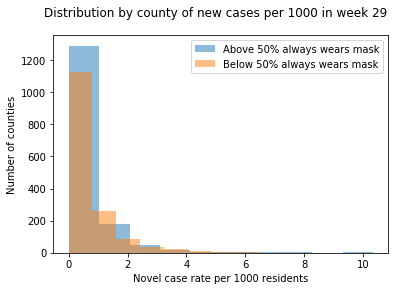

In [85]:
# plot novel cases per 1000 for w29 as a function of votergap
# show the logaritmic view to distribute the scatter more evenly
novel_case_rate_w29_hist_above_50_masked = plt.hist(covid_clean_mask_adoption_above_50pc['rate_w29']*1000, alpha=0.5, label='Above 50% always wears mask')
novel_case_rate_w29_hist_below_50_masked = plt.hist(covid_clean_mask_adoption_below_50pc['rate_w29']*1000, alpha=0.5, label='Below 50% always wears mask')
plt.xlabel("Novel case rate per 1000 residents")
plt.ylabel("Number of counties")
plt.legend()
plt.suptitle("Distribution by county of new cases per 1000 in week 29")
plt.show()

**Comment:** Without controlling for confounding factors, there seems to be rather unpronounced pattern between aobve 50 percent mask adoption and the increase in covid cases per thousand. For 100 counties, the number of cases seems 1 or 2 cases higher per thousand.

---

## Question 2 [35pts]: Regression modeling 

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.


**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  


**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?


**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


## Answers

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS

In [141]:
# shape the data for regression with one series
rate_w29 = covid_clean['rate_w29'].to_numpy().reshape(-1,1)
rate_w28 = covid_clean['rate_w28'].to_numpy().reshape(-1,1)

# add intercept
OLS_X = sm.tools.add_constant(rate_w28)

# fit the model on the training data
OLSModel = OLS(rate_w29,OLS_X).fit()
# print("Statmodels results: \n",OLSModel.params,sep="")
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     1938.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:                 18129.
No. Observations:                3108   AIC:                        -3.625e+04
Df Residuals:                    3106   BIC:                        -3.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004   1.45e-05     24.522      0.000       0.000       0.000
x1             0.6603      0.015     44.021      0.000       0.631       0.690
==============================================================================
Omnibus:                     1992.200   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           914336.075
Skew:                          -1.766   Prob(JB):                         0.00
Kurtosis:                      86.953   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
# grab the coefficients confidence intervals from the model
confidence_intervals = OLSModel.conf_int(alpha=0.05, cols=None)
pvalues = OLSModel.pvalues

In [157]:
pvalues

array([1.55126898e-121, 0.00000000e+000])

In [158]:
# printing values from the summary table
print("The 95% confidence interval for the intercept is:", confidence_intervals[0][0], "-", confidence_intervals[0][1])
print("The statistical significance (p-value) for the intercept is:", pvalues[0])
print("The 95% confidence interval for the slope is:", confidence_intervals[1][0], "-", confidence_intervals[1][1])
print("The statistical significances (p-value) for the slope is:", pvalues[1])

The 95% confidence interval for the intercept is: 0.00032658901296613653 - 0.00038335564460932316
The statistical significance (p-value) for the intercept is: 1.5512689757340049e-121
The 95% confidence interval for the slope is: 0.6309326693377665 - 0.6897576653275962
The statistical significances (p-value) for the slope is: 0.0


**Comment:** The statistical significance for both coefficients is 0. This means the probability that we would find these coefficients if the null hypothesis were true, is zero. As such, the coefficients are considered statistically significant.
The intercept coefficient is very close to 0. Most of the effect is therefore between rate_28 and rate_29.
The slope coefficient is estimated at 0.6603: for every increase in rate_28 for a county, we - on average - expect rate_29 rate to increase by 0.6603. As such - as the coefficient is less than one - this suggests the rate of COVID infection DEcreased from week 28 to week 29?

**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


In [38]:
######
# your code here
######

*your answer here*

**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.




In [39]:
######
# your code here
######

*your answer here*

**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  




In [40]:
######
# your code here
######

*your answer here*

**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?




*your answer here*

**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.



In [41]:
######
# your code here
######

*your answer here*

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 



*your answer here*

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


*your answer here*

---

## Question 3 [30pts]: Prediction modeling 

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','cancer','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the tuning parameters and briefly justify your choices (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?



## Answers

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','cancer','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.


In [42]:
######
# your code here
######

*your answer here*

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.


In [43]:
######
# your code here
######

*your answer here*

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the best tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.


In [44]:
######
# your code here
######

*your answer here*

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 



In [45]:
######
# your code here
######

*your answer here*

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.



In [46]:
######
# your code here
######

*your answer here*

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 



In [47]:
######
# your code here
######

*your answer here*

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?

In [48]:
######
# your code here
######

*your answer here*

---

## Question 4 [10pts]: Going further

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

## Answers

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

In [49]:
######
# your code here
######

*your answer here*

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.


In [50]:
######
# your code here
######

*your answer here*

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

In [51]:
######
# your code here
######



*your answer here*